## Procesamiento de Lenguage Natural
### Taller #11: Análisis de sentimiento
#### Rubio de Jesus Vasquez Bustamante

### Punto 0:  los datos del anterior taller

In [1]:
import pandas as pd 
import tweepy

In [36]:
## Leer llaves
keys = pd.read_csv("keys.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

In [37]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [49]:
#Recolectar datos
tweets = tweepy.Cursor(api.search,
                       q=['EPS'],
                       lang='es',
                       geocode=f'9.304744,-75.397778,405mi',
                       tweet_mode='extended',
                       include_rts=False).items(10000)

In [50]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogota")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [51]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data.size

2682

In [52]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [53]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions
0,@Supersalud @luisa61025371 @DavidRacero @Medim...,2020-11-20 21:42:06,Bogota,CARTAGENA DE INDIAS,1329902868489510918,https://twitter.com/i/web/status/1329902868489...,De esta manera fue que me robó mis plata...,[],[],"[@Supersalud, @luisa61025371, @DavidRacero, @M..."
1,@Supersalud @luisa61025371 @DavidRacero SRES @...,2020-11-20 21:38:03,Bogota,CARTAGENA DE INDIAS,1329901846996127745,https://twitter.com/i/web/status/1329901846996...,SRES ustedes ya la eps les mando datos so...,[],[],"[@Supersalud, @luisa61025371, @DavidRacero, @S..."
2,@odpdh @Supersalud @CoomevaSaludEPS @acemi_gre...,2020-11-20 21:36:30,Bogota,,1329901455722098692,https://twitter.com/i/web/status/1329901455722...,👏🏻👏🏻👏🏻👏🏻👏🏻A otras EPS deben hacerle ...,[],[],"[@odpdh, @Supersalud, @CoomevaSaludEPS, @acemi..."
3,Como cuando fui al médico porque literal me qu...,2020-11-20 21:30:15,Bogota,Medellín,1329899882807693315,https://twitter.com/i/web/status/1329899882807...,Como cuando fui al médico porque literal me qu...,[https://t.co/ncnCRtuXjv],[],[]
4,En Bogotá desde el 1 de septiembre el % casos ...,2020-11-20 21:28:26,Bogota,"Bogotá, D.C., Colombia",1329899427750948872,https://twitter.com/i/web/status/1329899427750...,En Bogotá desde el 1 de septiembre el % casos ...,"[https://t.co/AWjU8dwtXH, https://t.co/ssRorYV...",[],[]
...,...,...,...,...,...,...,...,...,...,...
442,RT @PublimetroCol: ¡Su padre ha estado en deli...,2020-11-19 09:25:55,Bogota,,1329355212520378369,https://twitter.com/i/web/status/1329355212520...,RT ¡Su padre ha estado en delicado estado de ...,[],[],[@PublimetroCol:]
443,RT @PublimetroCol: ¡Su padre ha estado en deli...,2020-11-19 08:51:16,Bogota,barranquilla colombia,1329346491048210432,https://twitter.com/i/web/status/1329346491048...,RT ¡Su padre ha estado en delicado estado de ...,[],[],[@PublimetroCol:]
444,Qué horrible es adaptarse a las hormonas. Cual...,2020-11-19 07:12:53,Bogota,"Bogotá, Colombia",1329321732738572289,https://twitter.com/i/web/status/1329321732738...,Qué horrible es adaptarse a las hormonas. Cual...,[],[],[]
445,Mi señora interior queda feliz cuando la EPS m...,2020-11-19 07:09:54,Bogota,"Bogotá, D.C., Colombia",1329320980678926337,https://twitter.com/i/web/status/1329320980678...,Mi señora interior queda feliz cuando la EPS m...,[],[],[]


## Punto 1: Hacer análisis de sentimiento de los datos del anterior taller

In [54]:
from googletrans import Translator
import pandas as pd


In [55]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader = SentimentIntensityAnalyzer()


In [56]:
translator = Translator()
data['ing'] = data['clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en'))
data

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,ing
0,@Supersalud @luisa61025371 @DavidRacero @Medim...,2020-11-20 21:42:06,Bogota,CARTAGENA DE INDIAS,1329902868489510918,https://twitter.com/i/web/status/1329902868489...,De esta manera fue que me robó mis plata...,[],[],"[@Supersalud, @luisa61025371, @DavidRacero, @M...","Translated(src=es, dest=en, text=In this way i..."
1,@Supersalud @luisa61025371 @DavidRacero SRES @...,2020-11-20 21:38:03,Bogota,CARTAGENA DE INDIAS,1329901846996127745,https://twitter.com/i/web/status/1329901846996...,SRES ustedes ya la eps les mando datos so...,[],[],"[@Supersalud, @luisa61025371, @DavidRacero, @S...","Translated(src=es, dest=en, text=SRES, you and..."
2,@odpdh @Supersalud @CoomevaSaludEPS @acemi_gre...,2020-11-20 21:36:30,Bogota,,1329901455722098692,https://twitter.com/i/web/status/1329901455722...,👏🏻👏🏻👏🏻👏🏻👏🏻A otras EPS deben hacerle ...,[],[],"[@odpdh, @Supersalud, @CoomevaSaludEPS, @acemi...","Translated(src=es, dest=en, text=👏🏻👏🏻👏🏻👏🏻👏🏻Oth..."
3,Como cuando fui al médico porque literal me qu...,2020-11-20 21:30:15,Bogota,Medellín,1329899882807693315,https://twitter.com/i/web/status/1329899882807...,Como cuando fui al médico porque literal me qu...,[https://t.co/ncnCRtuXjv],[],[],"Translated(src=es, dest=en, text=Like when I w..."
4,En Bogotá desde el 1 de septiembre el % casos ...,2020-11-20 21:28:26,Bogota,"Bogotá, D.C., Colombia",1329899427750948872,https://twitter.com/i/web/status/1329899427750...,En Bogotá desde el 1 de septiembre el % casos ...,"[https://t.co/AWjU8dwtXH, https://t.co/ssRorYV...",[],[],"Translated(src=es, dest=en, text=In Bogotá, si..."
...,...,...,...,...,...,...,...,...,...,...,...
442,RT @PublimetroCol: ¡Su padre ha estado en deli...,2020-11-19 09:25:55,Bogota,,1329355212520378369,https://twitter.com/i/web/status/1329355212520...,RT ¡Su padre ha estado en delicado estado de ...,[],[],[@PublimetroCol:],"Translated(src=es, dest=en, text=RT Your fathe..."
443,RT @PublimetroCol: ¡Su padre ha estado en deli...,2020-11-19 08:51:16,Bogota,barranquilla colombia,1329346491048210432,https://twitter.com/i/web/status/1329346491048...,RT ¡Su padre ha estado en delicado estado de ...,[],[],[@PublimetroCol:],"Translated(src=es, dest=en, text=RT Your fathe..."
444,Qué horrible es adaptarse a las hormonas. Cual...,2020-11-19 07:12:53,Bogota,"Bogotá, Colombia",1329321732738572289,https://twitter.com/i/web/status/1329321732738...,Qué horrible es adaptarse a las hormonas. Cual...,[],[],[],"Translated(src=es, dest=en, text=How horrible ..."
445,Mi señora interior queda feliz cuando la EPS m...,2020-11-19 07:09:54,Bogota,"Bogotá, D.C., Colombia",1329320980678926337,https://twitter.com/i/web/status/1329320980678...,Mi señora interior queda feliz cuando la EPS m...,[],[],[],"Translated(src=es, dest=en, text=My inner lady..."


In [57]:
data['ingles'] = data['ing'].apply(lambda valor: valor.text)
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,ing,ingles
0,@Supersalud @luisa61025371 @DavidRacero @Medim...,2020-11-20 21:42:06,Bogota,CARTAGENA DE INDIAS,1329902868489510918,https://twitter.com/i/web/status/1329902868489...,De esta manera fue que me robó mis plata...,[],[],"[@Supersalud, @luisa61025371, @DavidRacero, @M...","Translated(src=es, dest=en, text=In this way i...",In this way it was that he stole my money inve...
1,@Supersalud @luisa61025371 @DavidRacero SRES @...,2020-11-20 21:38:03,Bogota,CARTAGENA DE INDIAS,1329901846996127745,https://twitter.com/i/web/status/1329901846996...,SRES ustedes ya la eps les mando datos so...,[],[],"[@Supersalud, @luisa61025371, @DavidRacero, @S...","Translated(src=es, dest=en, text=SRES, you and...","SRES, you and the eps send you data on documen..."
2,@odpdh @Supersalud @CoomevaSaludEPS @acemi_gre...,2020-11-20 21:36:30,Bogota,,1329901455722098692,https://twitter.com/i/web/status/1329901455722...,👏🏻👏🏻👏🏻👏🏻👏🏻A otras EPS deben hacerle ...,[],[],"[@odpdh, @Supersalud, @CoomevaSaludEPS, @acemi...","Translated(src=es, dest=en, text=👏🏻👏🏻👏🏻👏🏻👏🏻Oth...",👏🏻👏🏻👏🏻👏🏻👏🏻Other EPS should do the same
3,Como cuando fui al médico porque literal me qu...,2020-11-20 21:30:15,Bogota,Medellín,1329899882807693315,https://twitter.com/i/web/status/1329899882807...,Como cuando fui al médico porque literal me qu...,[https://t.co/ncnCRtuXjv],[],[],"Translated(src=es, dest=en, text=Like when I w...",Like when I went to the doctor because I liter...
4,En Bogotá desde el 1 de septiembre el % casos ...,2020-11-20 21:28:26,Bogota,"Bogotá, D.C., Colombia",1329899427750948872,https://twitter.com/i/web/status/1329899427750...,En Bogotá desde el 1 de septiembre el % casos ...,"[https://t.co/AWjU8dwtXH, https://t.co/ssRorYV...",[],[],"Translated(src=es, dest=en, text=In Bogotá, si...","In Bogotá, since September 1, the% of cases to..."


In [58]:
data['sentimiento'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,tweet,date,city,user_location,id,link,clean,links,hashtags,mentions,ing,ingles,sentimiento
0,@Supersalud @luisa61025371 @DavidRacero @Medim...,2020-11-20 21:42:06,Bogota,CARTAGENA DE INDIAS,1329902868489510918,https://twitter.com/i/web/status/1329902868489...,De esta manera fue que me robó mis plata...,[],[],"[@Supersalud, @luisa61025371, @DavidRacero, @M...","Translated(src=es, dest=en, text=In this way i...",In this way it was that he stole my money inve...,0.0000
1,@Supersalud @luisa61025371 @DavidRacero SRES @...,2020-11-20 21:38:03,Bogota,CARTAGENA DE INDIAS,1329901846996127745,https://twitter.com/i/web/status/1329901846996...,SRES ustedes ya la eps les mando datos so...,[],[],"[@Supersalud, @luisa61025371, @DavidRacero, @S...","Translated(src=es, dest=en, text=SRES, you and...","SRES, you and the eps send you data on documen...",-0.2263
2,@odpdh @Supersalud @CoomevaSaludEPS @acemi_gre...,2020-11-20 21:36:30,Bogota,,1329901455722098692,https://twitter.com/i/web/status/1329901455722...,👏🏻👏🏻👏🏻👏🏻👏🏻A otras EPS deben hacerle ...,[],[],"[@odpdh, @Supersalud, @CoomevaSaludEPS, @acemi...","Translated(src=es, dest=en, text=👏🏻👏🏻👏🏻👏🏻👏🏻Oth...",👏🏻👏🏻👏🏻👏🏻👏🏻Other EPS should do the same,0.0000
3,Como cuando fui al médico porque literal me qu...,2020-11-20 21:30:15,Bogota,Medellín,1329899882807693315,https://twitter.com/i/web/status/1329899882807...,Como cuando fui al médico porque literal me qu...,[https://t.co/ncnCRtuXjv],[],[],"Translated(src=es, dest=en, text=Like when I w...",Like when I went to the doctor because I liter...,-0.2910
4,En Bogotá desde el 1 de septiembre el % casos ...,2020-11-20 21:28:26,Bogota,"Bogotá, D.C., Colombia",1329899427750948872,https://twitter.com/i/web/status/1329899427750...,En Bogotá desde el 1 de septiembre el % casos ...,"[https://t.co/AWjU8dwtXH, https://t.co/ssRorYV...",[],[],"Translated(src=es, dest=en, text=In Bogotá, si...","In Bogotá, since September 1, the% of cases to...",0.3612


In [59]:
data[['clean', 'sentimiento']].sort_values('sentimiento')

,clean,sentimiento
414,"Los médicos vivimos esas condiciones, 2 a 3 ...",-0.9349
382,RT No más niños muriendo por trabas administr...,-0.9042
233,Yo temo el día que crezca y cómo cualquier E...,-0.8885
147,También tuvimos que comprar las jeringas y ti...,-0.8847
45,"Ponen sanciones, pero el perjudicado que es...",-0.8839
...,...,...
80,Buen día. Por favor envíenos por mensaje ...,0.8750
219,"🚨 Realizamos frente a la EPS Sanitas, sede Pi...",0.9081
173,"Está bien, ojalá y mejoren la atenci...",0.9169
288,Estoy enamorada del ITM haciendo campañas para...,0.9231


 ### Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [60]:
#¿Cuál es el tuit más positivo?
data.loc[287]['clean']

' Ya quisiera uno vacunarse. Pero las EPS solamente les dan vacunas a los mayores de 60 años. Las personas en edad laboral deberíamos recibir también gratis ésta vacuna, ya que aportamos a la salud y movemos la economía del país. VACUNA INFLUENCIA GRATIS PARA TODOS!!'

In [61]:
#¿Cuál es el tuit más negativo?
data.loc[414]['clean']

'  Los médicos vivimos esas condiciones, 2 a 3 trabajos, sin festivos, sin fines de semana, sin vacaciones (porq como cuadrarlas en 3 sitios), trabajo 24/7, con mayor riesgo de enfermar, pagando 2 o 3 veces la EPS que no da citas, con 3 ARL q no aceptan enfermedades laborales.'

### Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [114]:
# tuits negativos
subset_df = data[data["sentimiento"] <= 0]
column_count1 = subset_df["sentimiento"].count()
data['Sent_Neg']=subset_df["sentimiento"]
column_count1

289

In [115]:
# tuits positivos
subset_df = data[data["sentimiento"] > 0]
column_count2 = subset_df["sentimiento"].count()
data['Sent_Pos']=subset_df["sentimiento"]
column_count2

158

# Diagrama de barras de la pregunta 3

In [128]:
data['label'] = 0
data.loc[df['sentimiento'] > 0.0, 'label'] = 1
data.loc[df['sentimiento'] < -0.0, 'label'] = -1
data['label']

0      0
1     -1
2      0
3     -1
4      1
      ..
442   -1
443   -1
444   -1
445    1
446    1
Name: label, Length: 447, dtype: int64

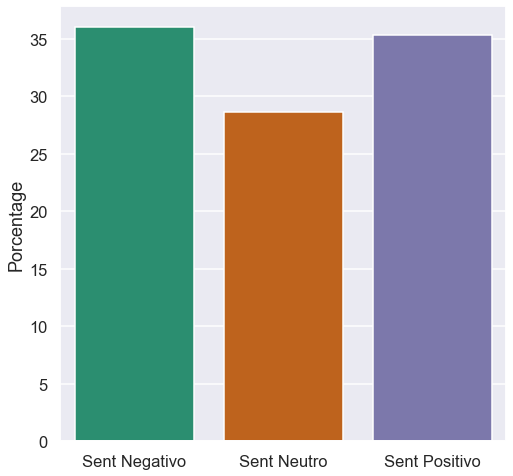

In [133]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
fig, ax = plt.subplots(figsize=(8, 8))

counts = data.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Sent Negativo', 'Sent Neutro', 'Sent Positivo'])
ax.set_ylabel("Porcentage")

plt.show()

#  Nubes de palabras por sentimiento

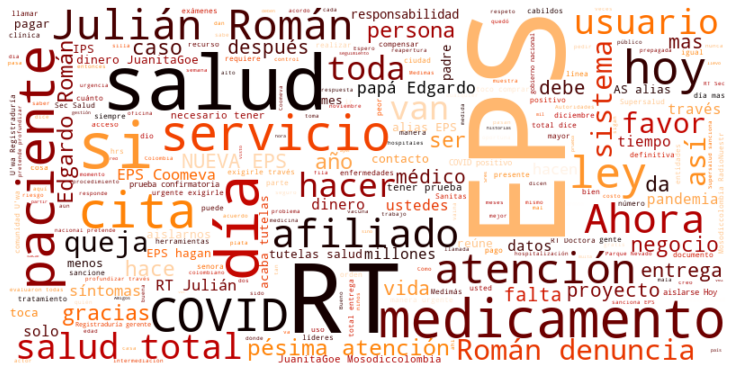

In [123]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from nltk.corpus import stopwords
stopwords = set(stopwords.words('spanish'))
palabras = data.clean.str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                     max_font_size=150, max_words=250,
                     background_color='white', colormap='gist_heat',
                     stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()